In [68]:
import pandas as pd
import numpy as np
import json
import os
import datetime as dt

### Load the USDM data

In [2]:
path = '../../../../../../../Google Drive/Shared drives/Capstone Project/Data/USDM/'
filename = 'CountyUSDM_112000-12312020'

In [3]:
usdm_df = pd.read_csv(path+filename+'.csv')

In [4]:
usdm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67952 entries, 0 to 67951
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MapDate            67952 non-null  int64  
 1   FIPS               67952 non-null  int64  
 2   County             67952 non-null  object 
 3   State              67952 non-null  object 
 4   None               67952 non-null  float64
 5   D0                 67952 non-null  float64
 6   D1                 67952 non-null  float64
 7   D2                 67952 non-null  float64
 8   D3                 67952 non-null  float64
 9   D4                 67952 non-null  float64
 10  ValidStart         67952 non-null  object 
 11  ValidEnd           67952 non-null  object 
 12  StatisticFormatID  67952 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 6.7+ MB


In [5]:
usdm_df.head()

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20201229,36001,Albany County,NY,100.0,0.0,0.0,0.0,0.0,0.0,2020-12-29,2021-01-04,1
1,20201222,36001,Albany County,NY,100.0,0.0,0.0,0.0,0.0,0.0,2020-12-22,2020-12-28,1
2,20201215,36001,Albany County,NY,100.0,0.0,0.0,0.0,0.0,0.0,2020-12-15,2020-12-21,1
3,20201208,36001,Albany County,NY,100.0,0.0,0.0,0.0,0.0,0.0,2020-12-08,2020-12-14,1
4,20201201,36001,Albany County,NY,100.0,0.0,0.0,0.0,0.0,0.0,2020-12-01,2020-12-07,1


In [6]:
# Number of unique values
usdm_df.nunique()

MapDate              1096
FIPS                   62
County                 62
State                   1
None                 3226
D0                   3226
D1                   1346
D2                    349
D3                     95
D4                      1
ValidStart           1096
ValidEnd             1096
StatisticFormatID       1
dtype: int64

### USDM Data Cleaning
We do not have any nulls but will require changing the object type to respective correct data types

In [7]:
# Correcting the category data types
usdm_df['County'] = usdm_df['County'].astype('category')
usdm_df['State'] = usdm_df['State'].astype('category') #Not required as it is only for one state but for safe side coverting it

In [8]:
# Correcting the datetime data types (YYYY-MM-DD)	
usdm_df['ValidStart'] = pd.to_datetime(usdm_df['ValidStart'], format = '%Y-%m-%d')
usdm_df['ValidEnd'] = pd.to_datetime(usdm_df['ValidEnd'], format = '%Y-%m-%d')

In [9]:
usdm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67952 entries, 0 to 67951
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MapDate            67952 non-null  int64         
 1   FIPS               67952 non-null  int64         
 2   County             67952 non-null  category      
 3   State              67952 non-null  category      
 4   None               67952 non-null  float64       
 5   D0                 67952 non-null  float64       
 6   D1                 67952 non-null  float64       
 7   D2                 67952 non-null  float64       
 8   D3                 67952 non-null  float64       
 9   D4                 67952 non-null  float64       
 10  ValidStart         67952 non-null  datetime64[ns]
 11  ValidEnd           67952 non-null  datetime64[ns]
 12  StatisticFormatID  67952 non-null  int64         
dtypes: category(2), datetime64[ns](2), float64(6), int64(3)
memor

In [95]:
usdm_df['County'].unique()

['Albany County', 'Allegany County', 'Bronx County', 'Broome County', 'Cattaraugus County', ..., 'Washington County', 'Wayne County', 'Westchester County', 'Wyoming County', 'Yates County']
Length: 62
Categories (62, object): ['Albany County', 'Allegany County', 'Bronx County', 'Broome County', ..., 'Wayne County', 'Westchester County', 'Wyoming County', 'Yates County']

In [30]:
usdm_df['FIPS'].unique()

array([36001, 36003, 36005, 36007, 36009, 36011, 36013, 36015, 36017,
       36019, 36021, 36023, 36025, 36027, 36029, 36031, 36033, 36035,
       36037, 36039, 36041, 36043, 36045, 36047, 36049, 36051, 36053,
       36055, 36057, 36059, 36061, 36063, 36065, 36067, 36069, 36071,
       36073, 36075, 36077, 36079, 36081, 36083, 36085, 36087, 36089,
       36091, 36093, 36095, 36097, 36099, 36101, 36103, 36105, 36107,
       36109, 36111, 36113, 36115, 36117, 36119, 36121, 36123])

In [31]:
usdm_df['FIPS'].min()

36001

In [32]:
usdm_df['FIPS'].max()

36123

In [72]:
# Add year column
usdm_df['Year'] = usdm_df['ValidEnd'].dt.year

In [77]:
# Add month column
usdm_df['Month'] = usdm_df['ValidEnd'].dt.month
# 1 - Jan to 12 - Dec

In [78]:
usdm_df.head()

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,Year,Month
0,20201229,36001,Albany County,NY,100.0,0.0,0.0,0.0,0.0,0.0,2020-12-29,2021-01-04,1,2021,1
1,20201222,36001,Albany County,NY,100.0,0.0,0.0,0.0,0.0,0.0,2020-12-22,2020-12-28,1,2020,12
2,20201215,36001,Albany County,NY,100.0,0.0,0.0,0.0,0.0,0.0,2020-12-15,2020-12-21,1,2020,12
3,20201208,36001,Albany County,NY,100.0,0.0,0.0,0.0,0.0,0.0,2020-12-08,2020-12-14,1,2020,12
4,20201201,36001,Albany County,NY,100.0,0.0,0.0,0.0,0.0,0.0,2020-12-01,2020-12-07,1,2020,12


In [99]:
usdm_df.describe()

,MapDate,FIPS,None,D0,D1,D2,D3,D4,StatisticFormatID,Year,Month
count,6.795200e+04,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,67952.0,67952.0,67952.000000,67952.000000
mean,2.010069e+07,36062.000000,81.822935,18.177065,5.630416,1.395667,0.165790,0.0,1.0,2010.017336,6.527372
std,6.056363e+04,35.791324,36.504226,36.504226,21.653491,11.005446,3.557408,0.0,0.0,6.057756,3.450559
min,2.000010e+07,36001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,2000.000000,1.000000
25%,2.005039e+07,36031.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,2005.000000,4.000000
50%,2.010067e+07,36062.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,2010.000000,7.000000
75%,2.015095e+07,36093.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,2015.000000,10.000000
max,2.020123e+07,36123.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,1.0,2021.000000,12.000000


### USDM Data Exploratory Data Analysis

1. map to show the county wise d values 


In [43]:
import plotly.express as px
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [11]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [39]:
# fig = px.choropleth(usdm_df, geojson=counties, locations='FIPS', color=max('D0','D1','D2','D3','D4'),
#                            color_continuous_scale="Viridis",
#                            scope="usa",
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [63]:
usdm_df.sort_values(by = ['D4','D3','D2','D1','D0'], ascending = False).head(50)

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
3166,20020430,36005,Bronx County,NY,0.0,100.0,100.0,100.0,100.00,0.0,2002-04-30,2002-05-06,1
3167,20020423,36005,Bronx County,NY,0.0,100.0,100.0,100.0,100.00,0.0,2002-04-23,2002-04-29,1
3168,20020416,36005,Bronx County,NY,0.0,100.0,100.0,100.0,100.00,0.0,2002-04-16,2002-04-22,1
26182,20020430,36047,Kings County,NY,0.0,100.0,100.0,100.0,100.00,0.0,2002-04-30,2002-05-06,1
26183,20020423,36047,Kings County,NY,0.0,100.0,100.0,100.0,100.00,0.0,2002-04-23,2002-04-29,1
26184,20020416,36047,Kings County,NY,0.0,100.0,100.0,100.0,100.00,0.0,2002-04-16,2002-04-22,1
27622,20160927,36051,Livingston County,NY,0.0,100.0,100.0,100.0,100.00,0.0,2016-09-27,2016-10-03,1
27623,20160920,36051,Livingston County,NY,0.0,100.0,100.0,100.0,100.00,0.0,2016-09-20,2016-09-26,1
27624,20160913,36051,Livingston County,NY,0.0,100.0,100.0,100.0,100.00,0.0,2016-09-13,2016-09-19,1
27625,20160906,36051,Livingston County,NY,0.0,100.0,100.0,100.0,100.00,0.0,2016-09-06,2016-09-12,1


In [74]:
usdm_df.groupby(['County','Year']).mean()

MapDate     FIPS        None         D0         D1  \
County        Year                                                            
Albany County 2000  2.000065e+07  36001.0  100.000000   0.000000   0.000000   
              2001  2.001048e+07  36001.0   62.051509  37.948491   8.792453   
              2002  2.002066e+07  36001.0   44.263462  55.736538  19.623077   
              2003  2.003048e+07  36001.0  100.000000   0.000000   0.000000   
              2004  2.004048e+07  36001.0   99.206346   0.793654   0.000000   
...                          ...      ...         ...        ...        ...   
Yates County  2017  2.017047e+07  36123.0   75.000000  25.000000   6.486538   
              2018  2.018048e+07  36123.0   90.566981   9.433019   0.000000   
              2019  2.019066e+07  36123.0   98.264231   1.735769   0.000000   
              2020  2.020048e+07  36123.0   58.003846  41.996154  20.059615   
              2021  2.020123e+07  36123.0    3.440000  96.560000   0.000000   

                     D2   D3   D4  StatisticFormatID  
County        Year                                    
Albany County 2000  0.0  0.0  0.0                1.0  
              2001  0.0  0.0  0.0                1.0  
              2002  0.0  0.0  0.0                1.0  
              2003  0.0  0.0  0.0                1.0  
              2004  0.0  0.0  0.0                1.0  
...                 ...  ...  ...                ...  
Yates County  2017  0.0  0.0  0.0                1.0  
              2018  0.0  0.0  0.0                1.0  
              2019  0.0  0.0  0.0                1.0  
              2020  0.0  0.0  0.0                1.0  
              2021  0.0  0.0  0.0                1.0  

[1364 rows x 9 columns]

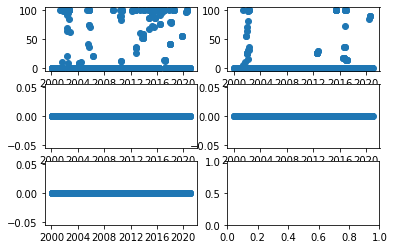

In [96]:
county = 'Albany County'
fig, ax = plt.subplots(3,2)
ax[0,0].scatter('ValidEnd', 'D0', data=usdm_df[usdm_df['County'] == county])
ax[0,1].scatter('ValidEnd', 'D1', data=usdm_df[usdm_df['County'] == county])
ax[1,0].scatter('ValidEnd', 'D2', data=usdm_df[usdm_df['County'] == county])
ax[1,1].scatter('ValidEnd', 'D3', data=usdm_df[usdm_df['County'] == county])
ax[2,0].scatter('ValidEnd', 'D4', data=usdm_df[usdm_df['County'] == county])

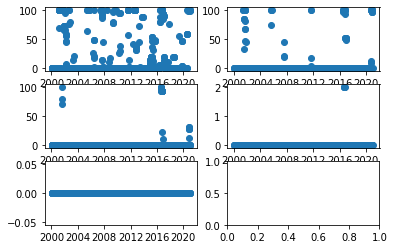

In [97]:
county = 'Allegany County'
fig, ax = plt.subplots(3,2)
ax[0,0].scatter('ValidEnd', 'D0', data=usdm_df[usdm_df['County'] == county])
ax[0,1].scatter('ValidEnd', 'D1', data=usdm_df[usdm_df['County'] == county])
ax[1,0].scatter('ValidEnd', 'D2', data=usdm_df[usdm_df['County'] == county])
ax[1,1].scatter('ValidEnd', 'D3', data=usdm_df[usdm_df['County'] == county])
ax[2,0].scatter('ValidEnd', 'D4', data=usdm_df[usdm_df['County'] == county])

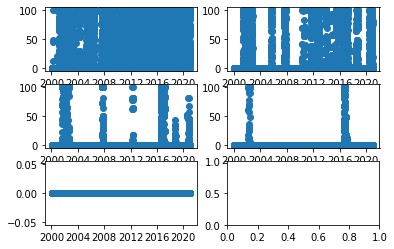

In [98]:
# Whole state
fig, ax = plt.subplots(3,2)
ax[0,0].scatter('ValidEnd', 'D0', data=usdm_df)
ax[0,1].scatter('ValidEnd', 'D1', data=usdm_df)
ax[1,0].scatter('ValidEnd', 'D2', data=usdm_df)
ax[1,1].scatter('ValidEnd', 'D3', data=usdm_df)
ax[2,0].scatter('ValidEnd', 'D4', data=usdm_df)

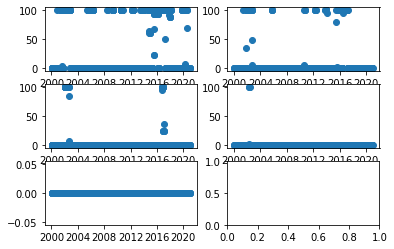

In [100]:
county = 'Bronx County'
fig, ax = plt.subplots(3,2)
ax[0,0].scatter('ValidEnd', 'D0', data=usdm_df[usdm_df['County'] == county])
ax[0,1].scatter('ValidEnd', 'D1', data=usdm_df[usdm_df['County'] == county])
ax[1,0].scatter('ValidEnd', 'D2', data=usdm_df[usdm_df['County'] == county])
ax[1,1].scatter('ValidEnd', 'D3', data=usdm_df[usdm_df['County'] == county])
ax[2,0].scatter('ValidEnd', 'D4', data=usdm_df[usdm_df['County'] == county])